In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train_df = pd.read_csv("ndvi-2010-2020.csv")
train_df.head()

,date,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,2010_01_01,0.493,0.184,0.412,0.458,0.420,0.419,0.405,0.424,0.415,...,0.357,0.375,0.511,0.534,0.525,0.512,0.381,0.551,0.376,0.685
1,2010_01_17,0.469,0.422,0.392,0.472,0.341,0.333,0.289,0.395,0.385,...,0.350,0.330,0.418,0.584,0.444,0.393,0.305,0.409,0.281,0.581
2,2010_02_02,0.436,-0.022,0.346,0.434,0.336,0.314,0.260,0.350,0.379,...,0.328,0.369,0.379,0.360,0.419,0.430,0.393,0.373,0.302,0.473
3,2010_02_18,0.401,0.058,0.369,0.404,0.278,0.308,0.242,0.347,0.367,...,0.291,0.419,0.406,0.305,0.428,0.383,0.450,0.323,0.288,0.421
4,2010_03_06,0.379,0.135,0.343,0.371,0.288,0.299,0.245,0.329,0.284,...,0.297,0.316,0.341,0.300,0.367,0.367,0.337,0.312,0.250,0.372


In [3]:
test_df = pd.read_csv("ndvi-2020-2022.csv")
test_df.head()

,date,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,2020_01_01,0.414,0.521,0.403,0.487,0.453,0.412,0.381,0.613,0.558,...,0.392,0.352,0.457,0.396,0.429,0.361,0.448,0.430,0.376,0.633
1,2020_01_17,0.383,0.568,0.444,0.482,0.381,0.390,0.324,0.528,0.518,...,0.354,0.283,0.420,0.369,0.408,0.361,0.346,0.420,0.376,0.521
2,2020_02_02,0.314,0.339,0.368,0.429,0.343,0.336,0.296,0.490,0.418,...,0.360,0.445,0.375,0.355,0.400,0.419,0.338,0.368,0.321,0.452
3,2020_02_18,0.332,0.326,0.340,0.411,0.333,0.320,0.276,0.402,0.393,...,0.343,0.304,0.359,0.300,0.375,0.340,0.303,0.352,0.340,0.412
4,2020_03_05,0.248,0.209,0.351,0.400,0.340,0.305,0.277,0.387,0.387,...,0.342,0.277,0.338,0.278,0.343,0.307,0.287,0.292,0.314,0.442


In [4]:
def dropCol(df, col):
    df.drop(axis = "columns", labels=col, inplace = True)

In [5]:
def splitDate(df):
    df[['year', 'month', 'day']] = df["date"].str.split("_",expand=True)
    dropCol(df, "date")

In [6]:
def preProcess(df):
    splitDate(df)
    dropCol(df, "year")
    df['month'] = df['month'].astype('int')
    df['day'] = df['day'].astype('int')

In [7]:
preProcess(train_df)
train_df.head()

,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,month,day
0,0.493,0.184,0.412,0.458,0.420,0.419,0.405,0.424,0.415,0.425,...,0.511,0.534,0.525,0.512,0.381,0.551,0.376,0.685,1,1
1,0.469,0.422,0.392,0.472,0.341,0.333,0.289,0.395,0.385,0.416,...,0.418,0.584,0.444,0.393,0.305,0.409,0.281,0.581,1,17
2,0.436,-0.022,0.346,0.434,0.336,0.314,0.260,0.350,0.379,0.319,...,0.379,0.360,0.419,0.430,0.393,0.373,0.302,0.473,2,2
3,0.401,0.058,0.369,0.404,0.278,0.308,0.242,0.347,0.367,0.313,...,0.406,0.305,0.428,0.383,0.450,0.323,0.288,0.421,2,18
4,0.379,0.135,0.343,0.371,0.288,0.299,0.245,0.329,0.284,0.305,...,0.341,0.300,0.367,0.367,0.337,0.312,0.250,0.372,3,6


In [8]:
test_dates = test_df['date']
preProcess(test_df)
test_df.head()

,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,month,day
0,0.414,0.521,0.403,0.487,0.453,0.412,0.381,0.613,0.558,0.441,...,0.457,0.396,0.429,0.361,0.448,0.430,0.376,0.633,1,1
1,0.383,0.568,0.444,0.482,0.381,0.390,0.324,0.528,0.518,0.322,...,0.420,0.369,0.408,0.361,0.346,0.420,0.376,0.521,1,17
2,0.314,0.339,0.368,0.429,0.343,0.336,0.296,0.490,0.418,0.313,...,0.375,0.355,0.400,0.419,0.338,0.368,0.321,0.452,2,2
3,0.332,0.326,0.340,0.411,0.333,0.320,0.276,0.402,0.393,0.264,...,0.359,0.300,0.375,0.340,0.303,0.352,0.340,0.412,2,18
4,0.248,0.209,0.351,0.400,0.340,0.305,0.277,0.387,0.387,0.330,...,0.338,0.278,0.343,0.307,0.287,0.292,0.314,0.442,3,5


In [9]:
X_train = train_df[['month', 'day']]
cells_ndvi_train = train_df.loc[:, (train_df.columns != 'month')]
cells_ndvi_train = cells_ndvi_train.loc[:, cells_ndvi_train.columns != 'day']
y_train = cells_ndvi_train.to_numpy().T

In [10]:
from sklearn.linear_model import LinearRegression
LR_models = [LinearRegression() for i in range(132)]

In [11]:
print(X_train.shape)
print(y_train[0].shape)

(230, 2)
(230,)


In [12]:
import time

start = time.time()
for i in range(len(LR_models)):
    LR_models[i].fit(X_train, y_train[i])
end = time.time()

print("Time taken: " + str(round(end-start, 2)) + "secs")

Time taken: 0.17secs


In [13]:
X_test = test_df[['month', 'day']]
cells_ndvi_test = test_df.loc[:, (test_df.columns != 'month')]
cells_ndvi_test = cells_ndvi_test.loc[:, cells_ndvi_test.columns != 'day']
y_test = cells_ndvi_test.to_numpy().T

In [14]:
y_prediction = []
for model in LR_models:
    prediction = model.predict(X_test)
    y_prediction.append([round(i,3) for i in prediction])
y_prediction = np.array(y_prediction)
y_prediction

array([[0.313, 0.304, 0.334, ..., 0.472, 0.502, 0.531],
       [0.295, 0.267, 0.313, ..., 0.404, 0.449, 0.494],
       [0.358, 0.348, 0.376, ..., 0.492, 0.52 , 0.548],
       ...,
       [0.333, 0.306, 0.352, ..., 0.457, 0.502, 0.548],
       [0.257, 0.251, 0.274, ..., 0.386, 0.408, 0.431],
       [0.472, 0.453, 0.492, ..., 0.602, 0.639, 0.678]])

In [15]:
print(y_prediction.shape)
print(y_test.shape)

(132, 66)
(132, 66)


In [16]:
y_test

array([[ 0.414,  0.383,  0.314, ...,  0.526,  0.711,  0.687],
       [ 0.521,  0.568,  0.339, ...,  0.129, -0.045,  0.417],
       [ 0.403,  0.444,  0.368, ...,  0.413,  0.686,  0.695],
       ...,
       [ 0.43 ,  0.42 ,  0.368, ...,  0.332,  0.497,  0.533],
       [ 0.376,  0.376,  0.321, ...,  0.27 ,  0.499,  0.482],
       [ 0.633,  0.521,  0.452, ...,  0.581,  0.758,  0.805]])

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_errors = []
mean_absolute_errors = []

for i in range(len(y_test)):
    mean_squared_errors.append(round(mean_squared_error(y_test[i], y_prediction[i]), 3))
    mean_absolute_errors.append(round(mean_absolute_error(y_test[i], y_prediction[i]), 3))

In [18]:
mean_squared_errors

[0.015,
 1514965.491,
 0.018,
 0.017,
 0.018,
 0.027,
 0.027,
 0.035,
 0.03,
 0.019,
 0.037,
 0.017,
 0.023,
 0.021,
 0.02,
 0.021,
 0.022,
 0.016,
 0.022,
 0.018,
 0.021,
 0.022,
 0.024,
 0.027,
 0.025,
 0.023,
 0.018,
 0.021,
 0.012,
 0.021,
 0.02,
 0.024,
 0.009,
 0.018,
 0.019,
 0.022,
 0.004,
 0.002,
 0.042,
 0.03,
 0.042,
 0.028,
 0.025,
 0.019,
 0.017,
 0.01,
 0.016,
 0.029,
 0.01,
 0.004,
 0.008,
 0.025,
 0.019,
 0.042,
 0.041,
 0.02,
 0.013,
 0.015,
 0.007,
 0.005,
 0.004,
 0.015,
 0.011,
 0.012,
 0.013,
 0.033,
 0.007,
 0.01,
 0.01,
 0.024,
 0.016,
 0.03,
 0.009,
 0.01,
 0.002,
 0.018,
 0.013,
 0.007,
 0.005,
 0.015,
 0.017,
 0.025,
 0.006,
 0.005,
 0.014,
 0.009,
 0.012,
 0.014,
 0.023,
 0.016,
 1514973.375,
 0.01,
 0.006,
 0.009,
 0.016,
 0.021,
 0.022,
 0.013,
 0.015,
 0.013,
 0.015,
 0.011,
 0.014,
 0.009,
 0.011,
 0.016,
 0.013,
 0.013,
 0.015,
 0.008,
 0.029,
 0.012,
 0.008,
 0.012,
 0.012,
 0.016,
 0.014,
 0.011,
 0.012,
 0.01,
 0.013,
 0.012,
 0.011,
 0.011,
 0.013,
 

In [19]:
mean_absolute_errors

[0.092,
 151.636,
 0.097,
 0.1,
 0.105,
 0.128,
 0.136,
 0.157,
 0.14,
 0.105,
 0.161,
 0.098,
 0.118,
 0.108,
 0.113,
 0.113,
 0.127,
 0.093,
 0.119,
 0.105,
 0.119,
 0.129,
 0.122,
 0.118,
 0.122,
 0.115,
 0.099,
 0.111,
 0.083,
 0.112,
 0.115,
 0.132,
 0.071,
 0.105,
 0.108,
 0.118,
 0.048,
 0.032,
 0.175,
 0.145,
 0.176,
 0.141,
 0.129,
 0.114,
 0.098,
 0.08,
 0.103,
 0.145,
 0.079,
 0.052,
 0.064,
 0.124,
 0.108,
 0.172,
 0.173,
 0.108,
 0.09,
 0.091,
 0.064,
 0.051,
 0.045,
 0.094,
 0.081,
 0.085,
 0.087,
 0.159,
 0.064,
 0.077,
 0.078,
 0.12,
 0.087,
 0.144,
 0.08,
 0.074,
 0.038,
 0.105,
 0.092,
 0.077,
 0.056,
 0.096,
 0.098,
 0.132,
 0.063,
 0.053,
 0.086,
 0.069,
 0.083,
 0.088,
 0.117,
 0.097,
 151.663,
 0.08,
 0.059,
 0.071,
 0.096,
 0.11,
 0.124,
 0.089,
 0.091,
 0.091,
 0.096,
 0.082,
 0.098,
 0.068,
 0.08,
 0.099,
 0.089,
 0.089,
 0.097,
 0.07,
 0.145,
 0.086,
 0.067,
 0.083,
 0.086,
 0.099,
 0.093,
 0.076,
 0.092,
 0.083,
 0.09,
 0.087,
 0.081,
 0.081,
 0.082,
 0.082,


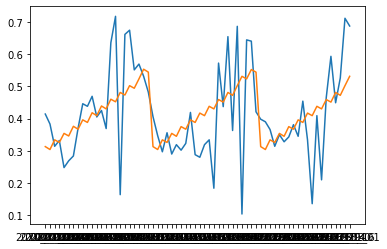

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
plt.plot(test_dates, y_test[0])
plt.plot(test_dates, y_prediction[0])
plt.show()
plt.savefig("cell_1_2020-22.jpeg")

In [21]:
year_dates = X_train[['month', 'day']][:23]
yearly_ndvi = []
for model in LR_models:
    yearly_ndvi.append([round(i,3) for i in model.predict(year_dates)])
yearly_ndvi = np.array(yearly_ndvi)
yearly_ndvi

array([[0.313, 0.304, 0.334, ..., 0.523, 0.552, 0.544],
       [0.295, 0.267, 0.313, ..., 0.467, 0.511, 0.483],
       [0.358, 0.348, 0.376, ..., 0.539, 0.566, 0.556],
       ...,
       [0.333, 0.306, 0.352, ..., 0.522, 0.566, 0.54 ],
       [0.257, 0.251, 0.274, ..., 0.425, 0.447, 0.442],
       [0.472, 0.453, 0.492, ..., 0.659, 0.696, 0.677]])

In [22]:
dates = []
for i in range(23):
    date = str(year_dates.month[i]) + "-" + str(year_dates.day[i])
    dates.append(date)

In [28]:
yearly_ndvi_df = pd.DataFrame(yearly_ndvi.T, columns = [str(i) for i in range(1, 133, 1)])
yearly_ndvi_df.insert(0, 'date', dates)
yearly_ndvi_df.head()

,date,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,1-1,0.313,0.295,0.358,0.406,0.321,0.290,0.278,0.352,0.347,...,0.291,0.342,0.364,0.370,0.386,0.374,0.345,0.333,0.257,0.472
1,1-17,0.304,0.267,0.348,0.400,0.314,0.300,0.281,0.357,0.351,...,0.290,0.332,0.354,0.376,0.374,0.361,0.339,0.306,0.251,0.453
2,2-2,0.334,0.313,0.376,0.424,0.344,0.316,0.303,0.374,0.370,...,0.305,0.350,0.373,0.377,0.394,0.389,0.361,0.352,0.274,0.492
3,2-18,0.326,0.285,0.366,0.418,0.337,0.326,0.306,0.379,0.374,...,0.304,0.339,0.363,0.382,0.382,0.376,0.355,0.326,0.269,0.472
4,3-6,0.354,0.326,0.393,0.441,0.366,0.344,0.329,0.397,0.394,...,0.319,0.355,0.381,0.384,0.400,0.401,0.375,0.367,0.290,0.507
5,3-22,0.345,0.298,0.383,0.435,0.359,0.354,0.332,0.402,0.398,...,0.319,0.345,0.371,0.390,0.388,0.388,0.369,0.341,0.285,0.488
6,4-7,0.375,0.344,0.411,0.460,0.389,0.370,0.354,0.420,0.418,...,0.334,0.363,0.391,0.391,0.408,0.416,0.390,0.387,0.307,0.527
7,4-23,0.367,0.317,0.401,0.454,0.382,0.380,0.357,0.424,0.422,...,0.333,0.352,0.381,0.396,0.396,0.403,0.385,0.361,0.302,0.507
8,5-9,0.396,0.361,0.429,0.477,0.411,0.396,0.379,0.442,0.441,...,0.348,0.370,0.400,0.397,0.415,0.430,0.406,0.406,0.324,0.545
9,5-25,0.388,0.333,0.419,0.471,0.404,0.407,0.383,0.447,0.445,...,0.347,0.359,0.390,0.403,0.403,0.417,0.400,0.379,0.318,0.526


In [24]:
yearly_ndvi_df.to_csv("yearly_ndvi_values.csv")

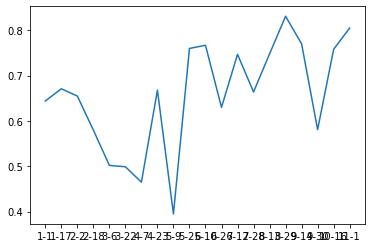

In [48]:
dates = []
for i in range(20):
    date = str(test_df.month[65-i]) + "-" + str(test_df.day[65-i])
    dates.append(date)
dates = dates[::-1]
plt.plot(dates, test_df["132"][46:])
plt.show()